In [60]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("jobs.csv")

df = df[df["Must haves"].apply(lambda x: not isinstance(x, float) and "Python" in x)]
df["Salary (mean)"] = (df["Bottom salary"] + df["Top salary"]) / 2
df.describe()

,Title,Company,Category,Remote,Seniority,Bottom salary,Top salary,Must haves,Nice to haves,Salary (mean)
0,Remote Senior Software Engineer with Python,CodiLime,Backend,1,Senior,20500,25000,"Linux,Git,Kubernetes,Communication skills,Pyth...","Golang,CI/CD,AWS,FastAPI",22750.0
1,Data Scientist,Lingaro,Data,1,Senior,21840,25200,"Python,Optimalization,Azure","SQL,Team management",23520.0
2,Senior Software Engineer,Digital Hub Warsaw at Bayer,AI,0,Senior,20000,30000,"Python,AI,Machine learning","AWS,TensorFlow,Spark,Keras,Flux",25000.0
3,Mid Data & AI Engineer FULLY REMOTE,Nest Bank,Data,1,Mid,15000,22000,"Big DATA,AI,Big Data,PySpark,Azure,Python,SQL,...",NaN,18500.0
4,Software Platform Developer,Ework Group,DevOps,1,Senior,29039,31943,"IaC,Cloud platform,Python,Kubernetes,Docker",NaN,30491.0
...,...,...,...,...,...,...,...,...,...,...
313,Python Team Leader (Principal),Volvo Group,Backend,0,Expert,25000,29000,"Python,Microservices,API,Unit testing,TDD,Docker",NaN,27000.0
314,Python Development Lead,HSBC Technology Poland,Backend,0,Senior,25000,30000,"Degree,Object-oriented programming,Python,Java...",NaN,27500.0
315,Senior Full-stack Python/React Developer,Proxet,Fullstack,1,Senior,20170,28238,"Python,React,TypeScript,JavaScript,PostgreSQL,...","API,Data engineering",24204.0
316,Fullstack Developer (Python + Django),Devire,Fullstack,0,Senior,22000,27000,"Python,Django,FastAPI,Flask,JavaScript,React","TypeScript,PostgreSQL,Linux,Bash,Git,Angular,C...",24500.0


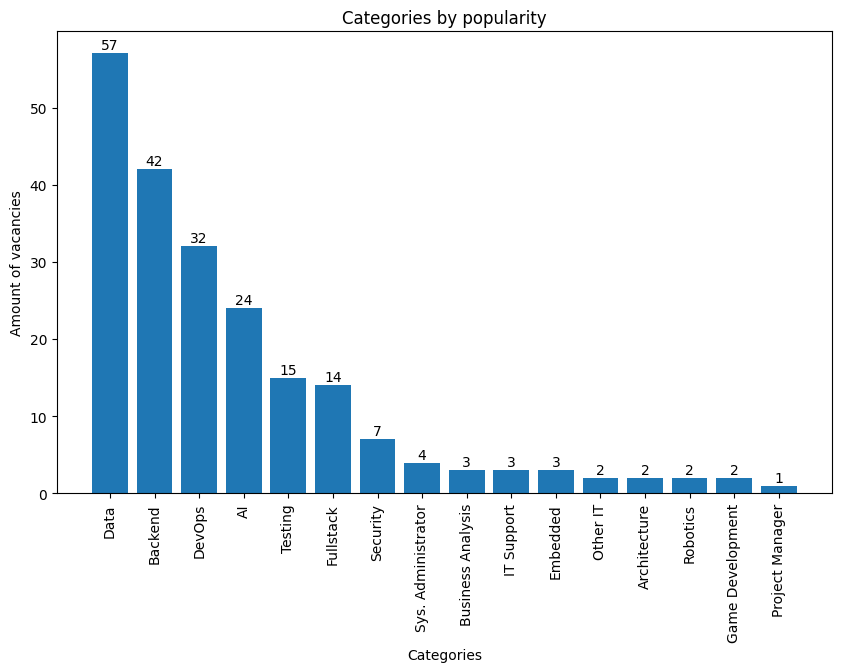

In [112]:
# Categories
categories = df["Category"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(categories.index.to_list(), height=categories, width=0.8)
plt.xticks(rotation=90)
plt.title("Categories by popularity")
plt.ylabel("Amount of vacancies")
plt.xlabel("Categories")

for i in range(len(categories)):
        plt.text(i, categories.iloc[i] + .5, categories.iloc[i], ha="center")

In [129]:
# Top 10 technologies required by amount (all categories)
must_haves_all = df["Must haves"]
must_haves_all = must_haves_all.str.split(",").explode()
must_haves_all = must_haves_all.value_counts().sort_values(ascending=False)

must_haves_all_labels = must_haves_all.index.to_list()[1:11]
must_haves_all_values = must_haves_all[1:11]

In [131]:
# Top 10 technologies required by amount (Data)
must_haves_data = df[df["Category"] == "Data"]["Must haves"]
must_haves_data = must_haves_data.str.split(",").explode()
must_haves_data = must_haves_data.value_counts().sort_values(ascending=False)

must_haves_data_labels = must_haves_data.index.to_list()[1:11]
must_haves_data_values = must_haves_data[1:11]

In [135]:
# Top 10 technologies required by amount (Backend)
must_haves_back = df[df["Category"] == "Backend"]["Must haves"]
must_haves_back = must_haves_back.str.split(",").explode()
must_haves_back = must_haves_back.value_counts().sort_values(ascending=False)

must_haves_back_labels = must_haves_back.index.to_list()[1:11]
must_haves_back_values = must_haves_back[1:11]

In [140]:
# Top 10 technologies required by amount (Backend)
must_haves_devops = df[df["Category"] == "DevOps"]["Must haves"]
must_haves_devops = must_haves_devops.str.split(",").explode()
must_haves_devops = must_haves_devops.value_counts().sort_values(ascending=False)

must_haves_devops_labels = must_haves_devops.index.to_list()[1:11]
must_haves_devops_values = must_haves_devops[1:11]

In [143]:
# Top 10 technologies required by amount (AI)
must_haves_ai = df[df["Category"] == "AI"]["Must haves"]
must_haves_ai = must_haves_ai.str.split(",").explode()
must_haves_ai = must_haves_ai.value_counts().sort_values(ascending=False)

must_haves_ai_labels = must_haves_ai.index.to_list()[1:11]
must_haves_ai_values = must_haves_ai[1:11]

In [151]:
# Top 10 technologies required by amount (Testing)
must_haves_test = df[df["Category"] == "Testing"]["Must haves"]
must_haves_test = must_haves_test.str.split(",").explode()
must_haves_test = must_haves_test.value_counts().sort_values(ascending=False)

must_haves_test_labels = must_haves_test.index.to_list()[1:11]
must_haves_test_values = must_haves_test[1:11]

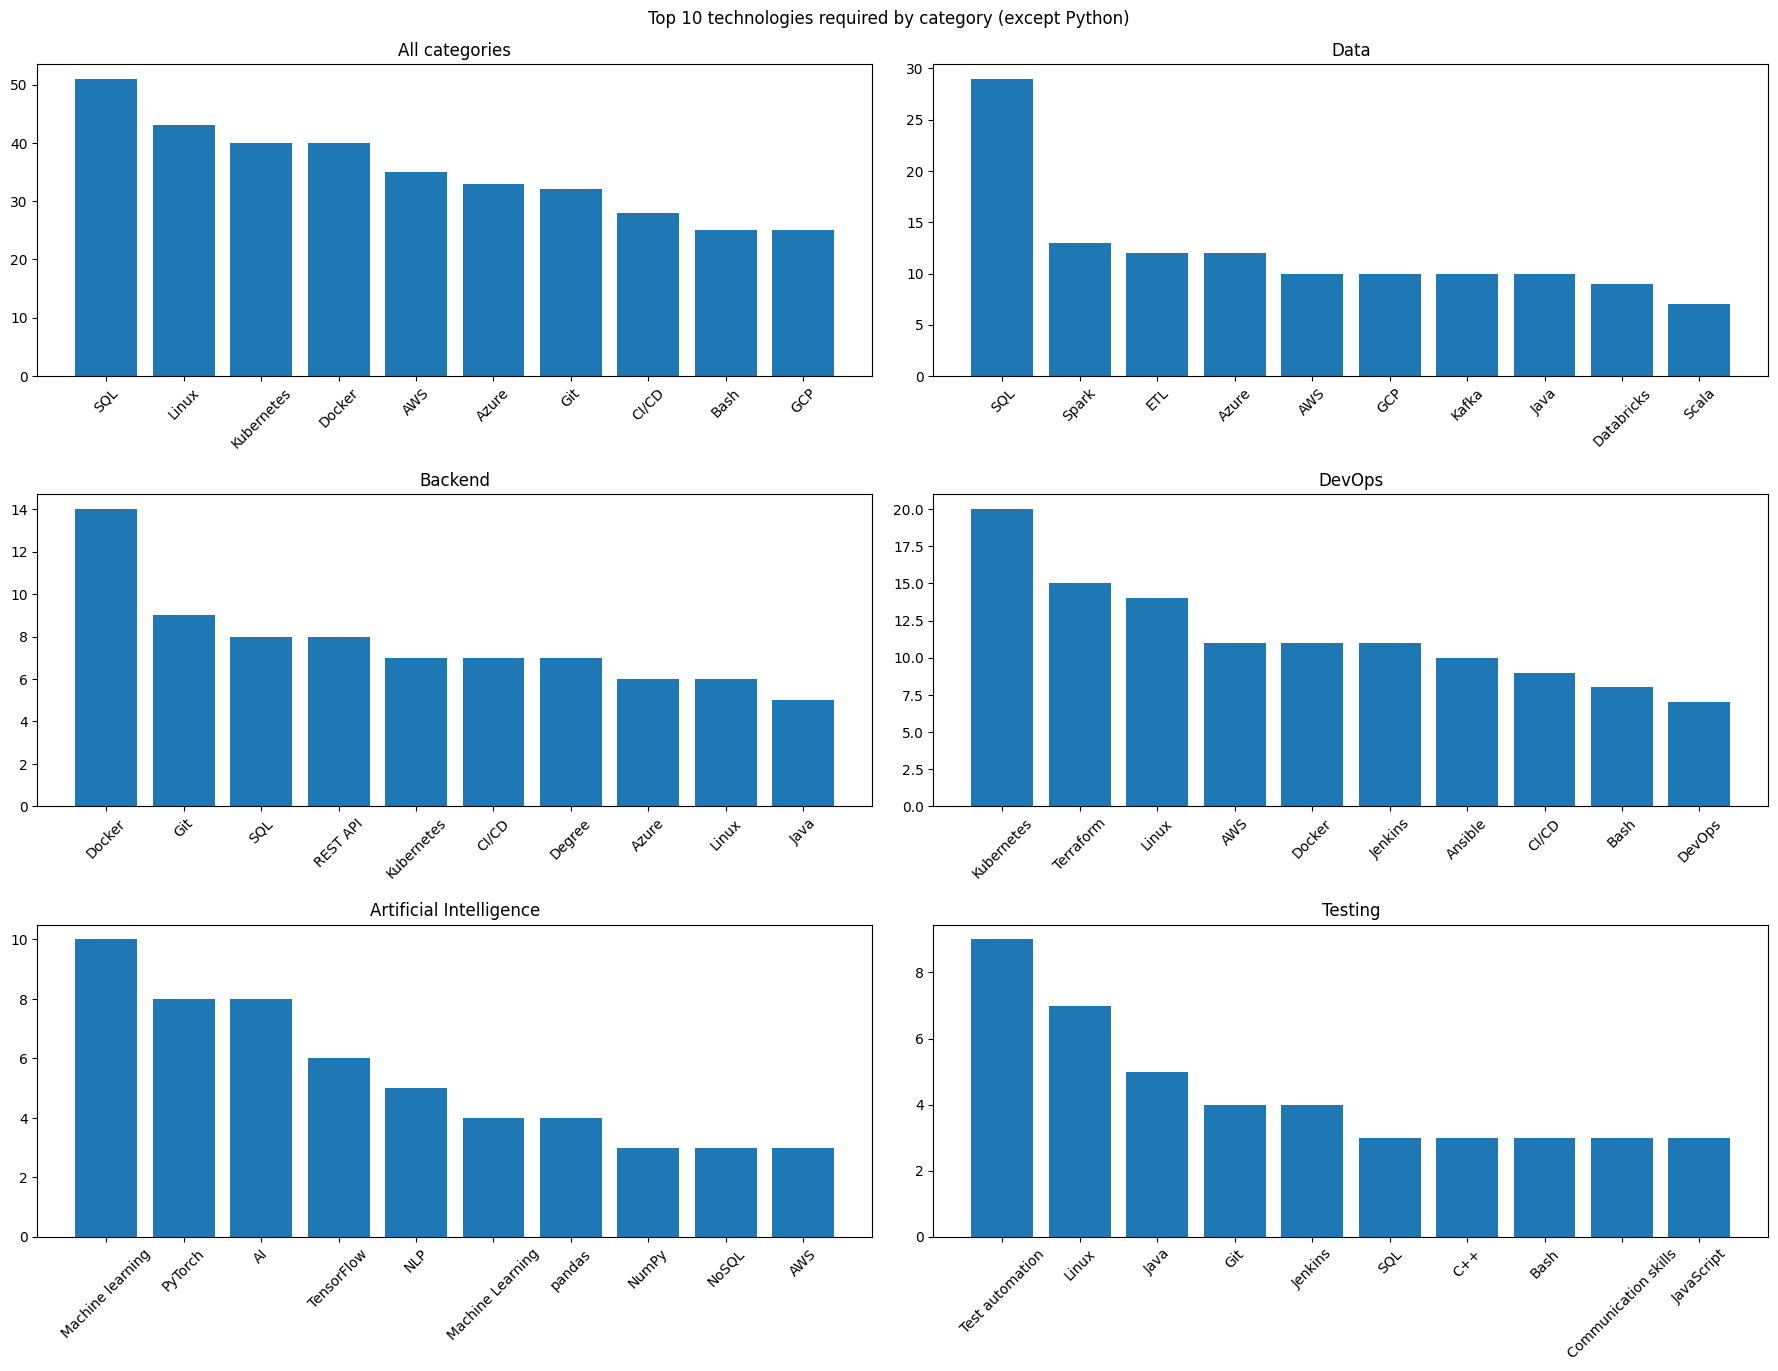

In [161]:
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(18, 14)
fig.suptitle("Top 10 technologies required by category (except Python)")

axs[0, 0].bar(must_haves_all_labels, height=must_haves_all_values)
axs[0, 0].tick_params("x", labelrotation=45)
axs[0, 0].set_title("All categories")

axs[0, 1].bar(must_haves_data_labels, must_haves_data_values)
axs[0, 1].tick_params("x", labelrotation=45)
axs[0, 1].set_title("Data")

axs[1, 0].bar(must_haves_back_labels, must_haves_back_values)
axs[1, 0].tick_params("x", labelrotation=45)
axs[1, 0].set_title("Backend")

axs[1, 1].bar(must_haves_devops_labels, must_haves_devops_values)
axs[1, 1].tick_params("x", labelrotation=45)
axs[1, 1].set_title("DevOps")

axs[2, 0].bar(must_haves_ai_labels, must_haves_ai_values)
axs[2, 0].tick_params("x", labelrotation=45)
axs[2, 0].set_title("Artificial Intelligence")

axs[2, 1].bar(must_haves_test_labels, must_haves_test_values)
axs[2, 1].tick_params("x", labelrotation=45)
axs[2, 1].set_title("Testing")

fig.tight_layout(pad=1.5)

Text(0.5, 0, 'Technologies')

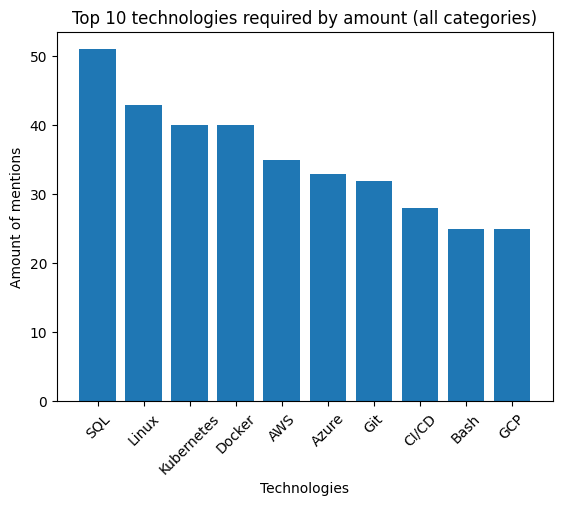

In [153]:
# Top 10 technologies required by amount (all categories)
must_haves_sr = df["Must haves"]
must_haves_sr = must_haves_sr.str.split(",").explode()
must_haves_sr = must_haves_sr.value_counts()
must_haves_sr = must_haves_sr.sort_values(ascending=False)

plt.bar(must_haves_sr.index.to_list()[1:11], height=must_haves_sr[1:11])
plt.xticks(rotation=45)
plt.title("Top 10 technologies required by amount (all categories)")
plt.ylabel("Amount of mentions")
plt.xlabel("Technologies")